狀態值: 
 Discrete(48)
動作值: 
 Discrete(4) 


策略 (上 = 0, 右 = 1, 下 = 2): 

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
迭代次數： 1000 / 10000
迭代次數： 2000 / 10000
迭代次數： 3000 / 10000
迭代次數： 4000 / 10000
迭代次數： 5000 / 10000
迭代次數： 6000 / 10000
迭代次數： 7000 / 10000
迭代次數： 8000 / 10000
迭代次數： 9000 / 10000
迭代次數： 10000 / 10000


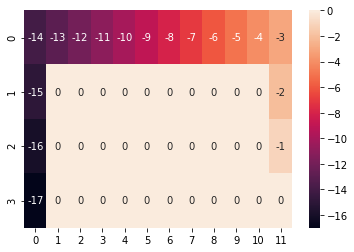

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

env = gym.make('CliffWalking-v0') #透過gym取的題目內容

#確認CliffWalking題目內容
print("狀態值: \n", env.observation_space) #確認觀測值有48個(4*12)
print("動作值: \n", env.action_space, "\n") #動作值有4個

#定義策略
cw_policy = np.hstack([1*np.ones(11),2, np.zeros(11),2 , np.zeros(11),2, 0, -1*np.ones(11)])
print("\n策略 (上 = 0, 右 = 1, 下 = 2): \n")
print(cw_policy.reshape(4,12))

#env為OpenAI Gym的環境、policy指的是智能體的策略、alpha指的是參數更新的步長、lambda指的是折扣率
def td_zero(env, num_episodes, policy, alpha, lambda_=1.0):
    cw_V = defaultdict(float) #初始化  
    #依據數量迭代
    for i_episode in range(1, num_episodes + 1):
        #印出目前迭代數量
        if i_episode % 1000 == 0:
            print("迭代次數：",i_episode,"/", num_episodes)
        #重置S
        state = env.reset()
        while True:
            action = policy[state] #選擇一個動作
            new_state, reward, done, info = env.step(action)#執行該動作並回饋新的狀態、獎勵
            #價值函數更新
            cw_V[state] = cw_V[state] + (alpha * (reward + (lambda_ * cw_V[new_state]) - cw_V[state]))            
            #更新最新的狀態
            state = new_state
            if done:
                break   
    return cw_V

#進行價值函數更新與策略衡量
td_cw_V_pred = td_zero(env, 10000, cw_policy, 0.01)

#TD運算視覺化
cw_V_pred = np.reshape([td_cw_V_pred[key] if key in td_cw_V_pred else 0 for key in np.arange(48)], (4,12)) 
plot_for_cw_V = sns.heatmap(cw_V_pred, annot=True)